#**SVM**

##Ejemplo 2 Pulsar Star

<img src = "https://cdn.mos.cms.futurecdn.net/43AazVpb9XwmZbPkwkrBbL.jpg" />


[¿Qué es una pulsar star?](https://www.youtube.com/watch?v=gjLk_72V9Bw)

https://www.space.com/32661-pulsars.html


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Lectura del archivo de entrenamiento
df = pd.read_csv ("/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/pulsar_data_train.csv")


Análisis exploratorio de los datos

In [ ]:
df.shape

(12528, 9)

In [ ]:
df.head ()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [ ]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [ ]:
#eliminar espacios de los nombres de las columnas
df.columns = df.columns.str.strip()
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [ ]:
#Renombrar columnas
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 
              'DM-SNR Skewness', 'target_class']

In [ ]:
#Distribución de las clases
df['target_class'].value_counts ()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [ ]:
#En porcentaje
df['target_class'].value_counts ()/np.float (len(df))

0.0    0.907966
1.0    0.092034
Name: target_class, dtype: float64

Por lo que existe un desbalance 

In [ ]:
#resumen del dataset
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          12528 non-null  float64
 1   IP Sd            12528 non-null  float64
 2   IP Kurtosis      10793 non-null  float64
 3   IP Skewness      12528 non-null  float64
 4   DM-SNR Mean      12528 non-null  float64
 5   DM-SNR Sd        11350 non-null  float64
 6   DM-SNR Kurtosis  12528 non-null  float64
 7   DM-SNR Skewness  11903 non-null  float64
 8   target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


Con valores faltantes, todos las variables numéricas

In [ ]:
df.isnull().sum()

IP Mean               0
IP Sd                 0
IP Kurtosis        1735
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd          1178
DM-SNR Kurtosis       0
DM-SNR Skewness     625
target_class          0
dtype: int64

In [ ]:
df = df.dropna (axis=0)

In [ ]:
df.isnull().sum ()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

In [ ]:
#resumen estadístico
round(df.describe(), 2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,9273.00,9273.00,9273.00,9273.00,9273.00,9273.00,9273.00,9273.00,9273.00
mean,111.13,46.51,0.48,1.79,12.74,26.33,8.33,105.78,0.09
std,25.69,6.78,1.07,6.29,29.77,19.54,4.55,108.17,0.29
min,6.19,24.77,-1.74,-1.79,0.21,7.37,-2.64,-1.98,0.00
25%,100.98,42.40,0.02,-0.19,1.91,14.38,5.79,34.92,0.00
50%,115.23,46.90,0.22,0.20,2.80,18.44,8.43,83.15,0.00
75%,127.33,51.00,0.47,0.93,5.46,28.39,10.72,139.77,0.00
max,189.73,91.81,8.07,68.10,211.95,110.64,34.54,1191.00,1.00


Es probable que existan puntos extremos


Text(0, 0.5, 'DM-SNR Skewness')

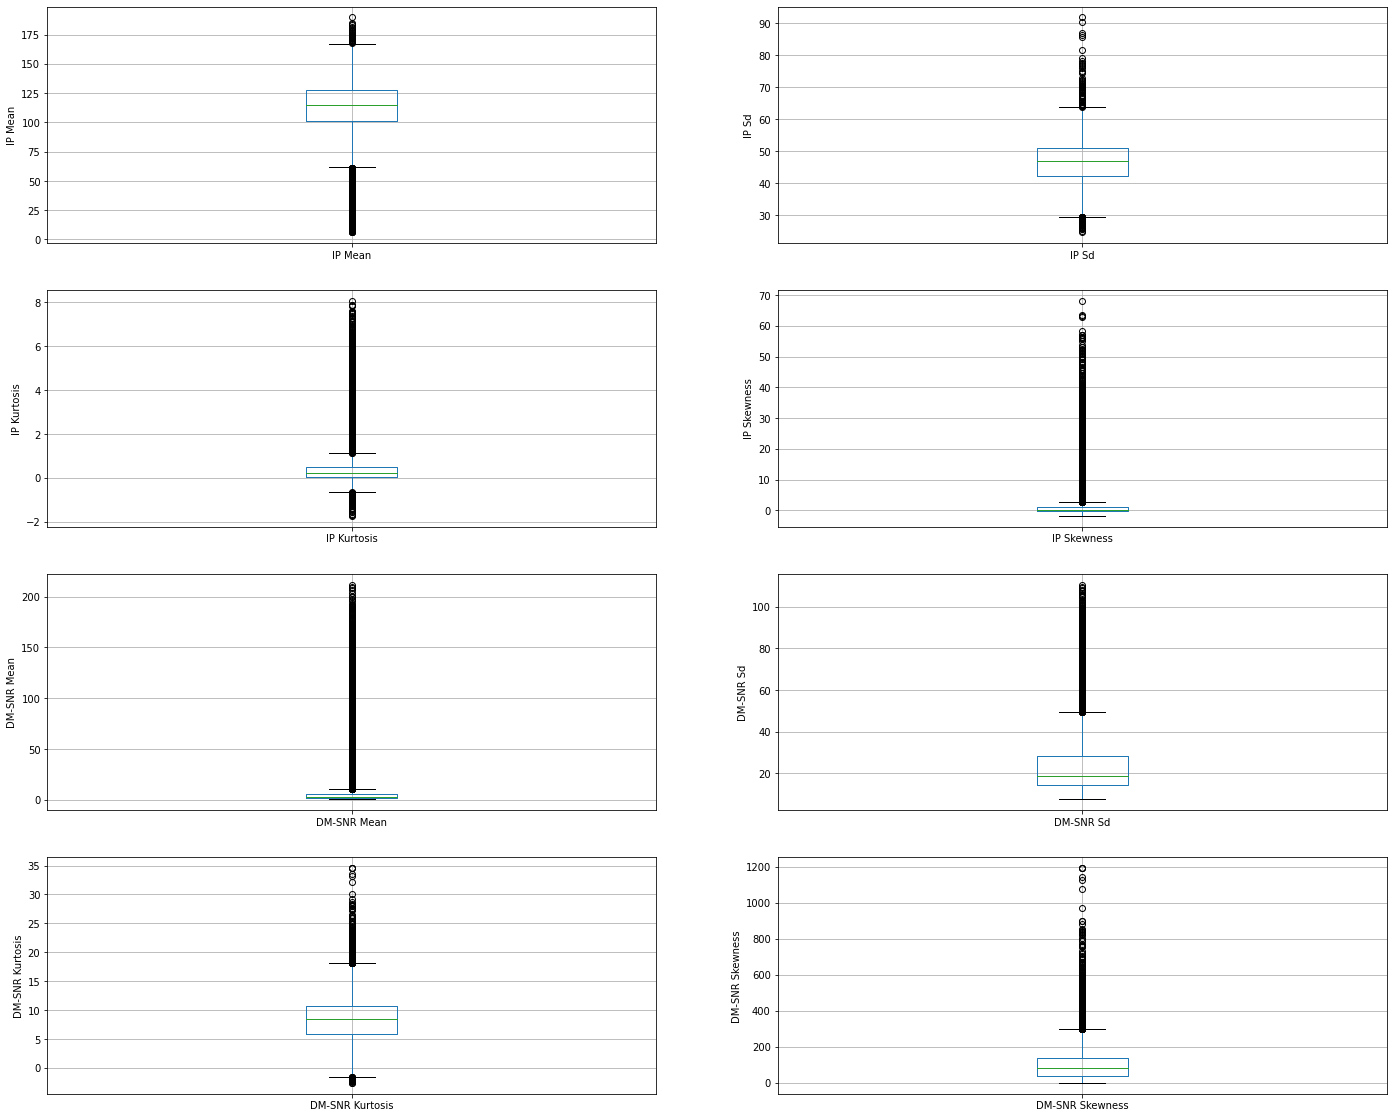

In [ ]:
#Box plots

plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

*Ejercicio:*

Crear gráficas de violín para analizar características y clase

In [ ]:
características = df.iloc[[],:-1]
características

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness


In [ ]:
características2 = df.iloc[:,0:8]

características2

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578
...,...,...,...,...,...,...,...,...
12522,124.828125,50.586731,0.233563,-0.286908,2.342809,13.949966,9.226188,117.308146
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018


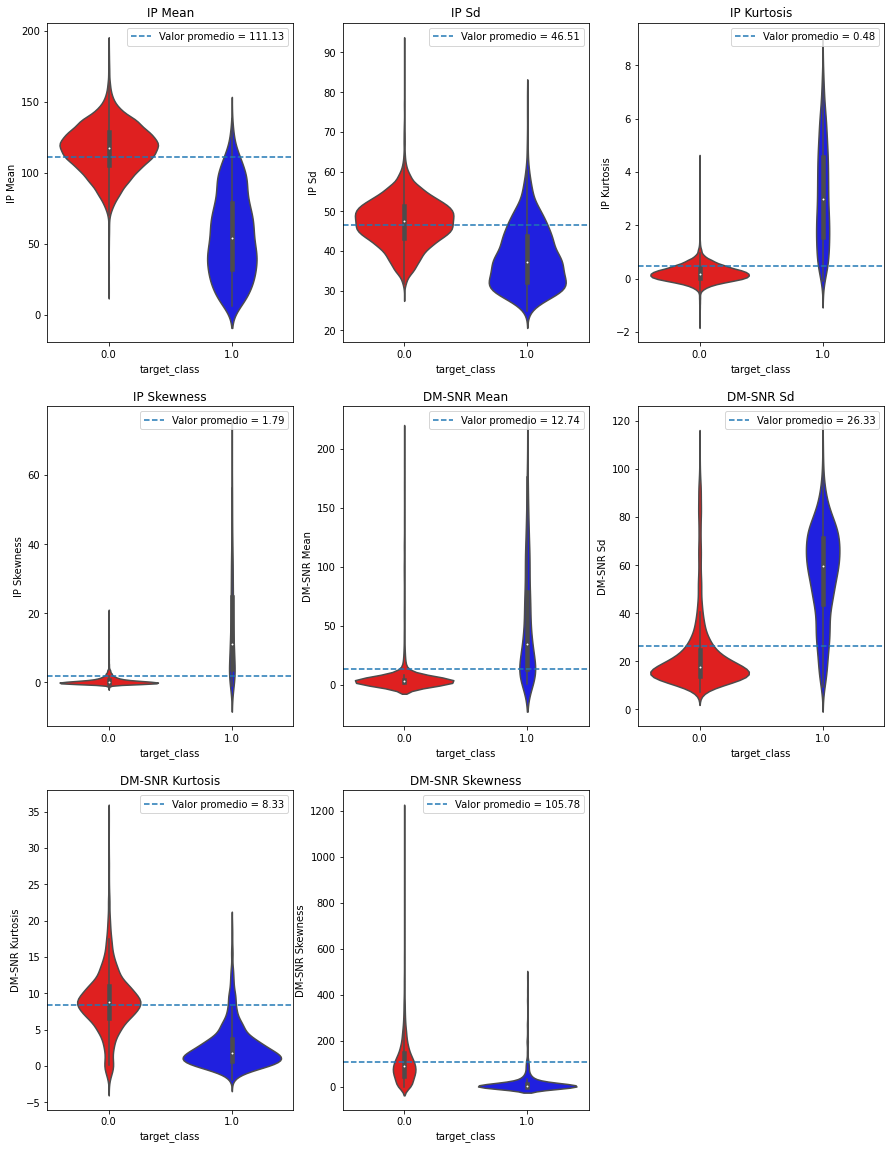

In [ ]:
características = df.iloc[[],:-1]
plt.figure(figsize=(15,20))
j = list(características)

for i in range(len(j)):
    plt.subplot(3,3,i+1)
    sns.violinplot(x=df['target_class'],y=df.iloc[:,i],palette=["red","blue"])
    plt.title(j[i])
    plt.axhline(df[j[i]].mean(), linestyle = "dashed", label ="Valor promedio = " + str(round(df[j[i]].mean(), 2)))
    plt.legend(loc="best")
  

In [ ]:
características = df.iloc[--,--]
plt.figure(figsize=(15,20))
j = ---
for i in ---:
    plt.subplot(3,3,---)
    sns.violinplot(x=---,y=---,palette=["red","blue"])
    plt.title(características[i])
    plt.axhline(df[i].mean(),linestyle = "dashed", label ="Valor promedio = " + str(round(df[i].---, 2)))
    plt.legend(loc="best")
    ---

Hay muchos puntos extremos.

Hay dos variantes en SVM: hard-margin y soft-margin.

Hard-margin no trata valores extremos, los datos de entrenamiento requieren estar bien clasificados.

Soft-margin, se tendrán algunos puntos mal clasificados. Por los mal clasificados hay una penalidad que se establece a través del parámetro C. Un valor bajo de C implica que se permitiran muchos puntos extremos, y viceversa.

Como hay muchos valores extremos, el valor de C durante el entrenamiento será algo

Distribución de las variables

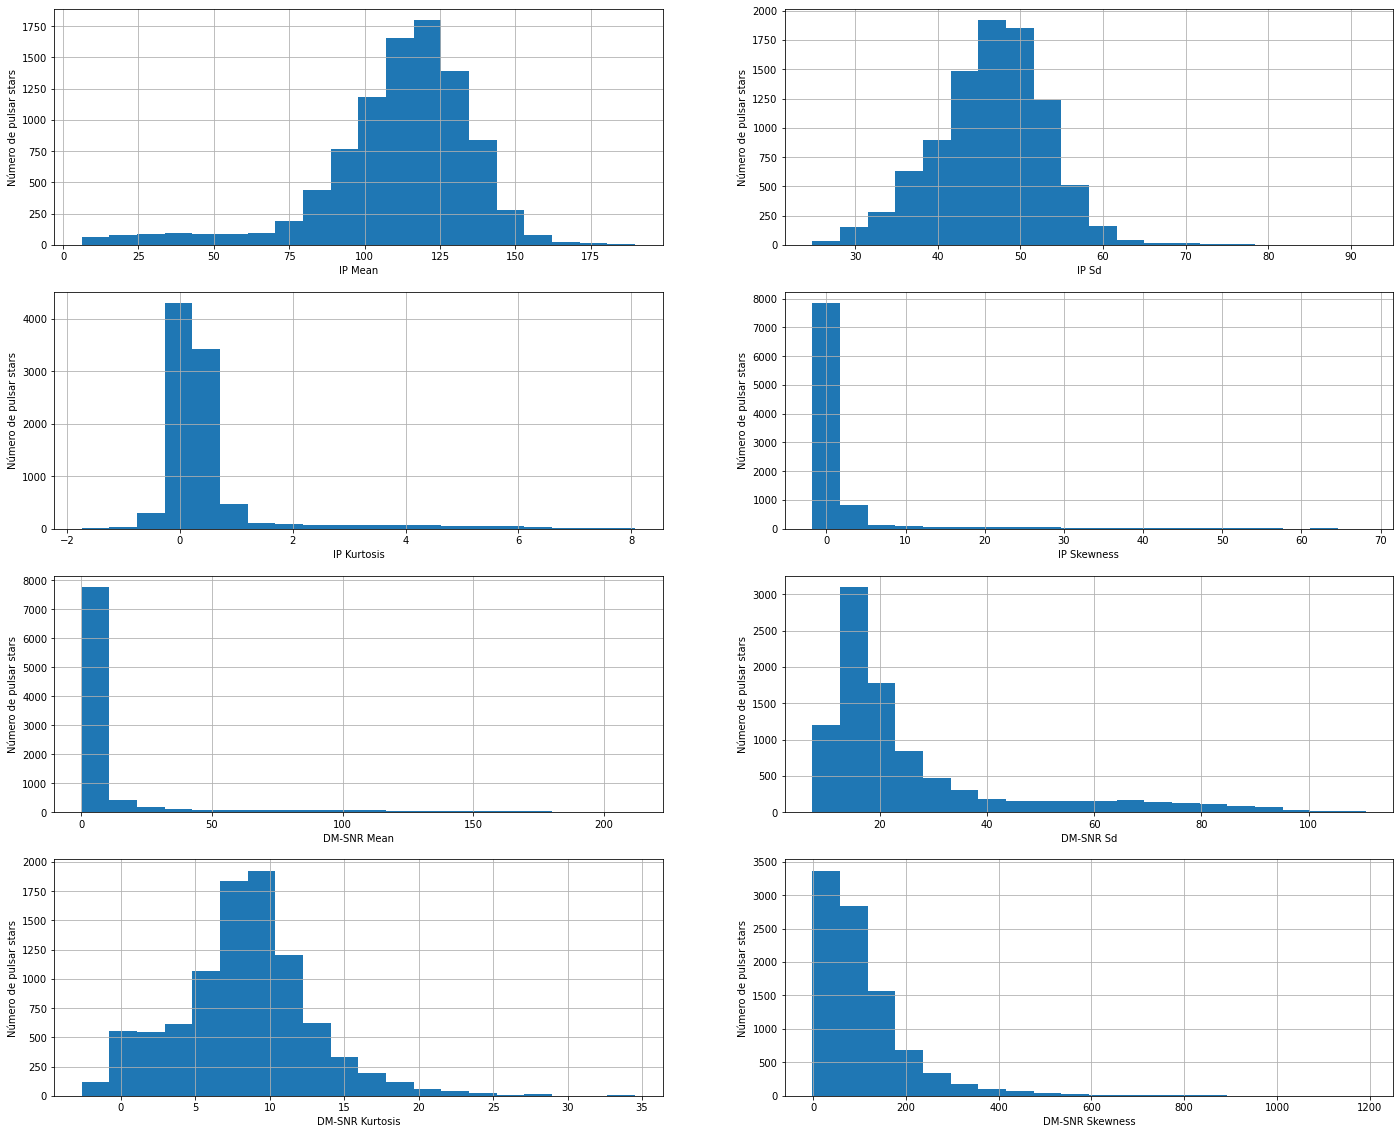

In [ ]:
características = df.iloc[[],:-1]
plt.figure(figsize=(24,20))
j = list(características)

for i in range(len(j)):
    plt.subplot(4,2,i+1)
    fig = df[j[i]].hist(bins=20)
    fig.set_xlabel(j[i])
    fig.set_ylabel('Número de pulsar stars')

Text(0, 0.5, 'Número de pulsar stars')

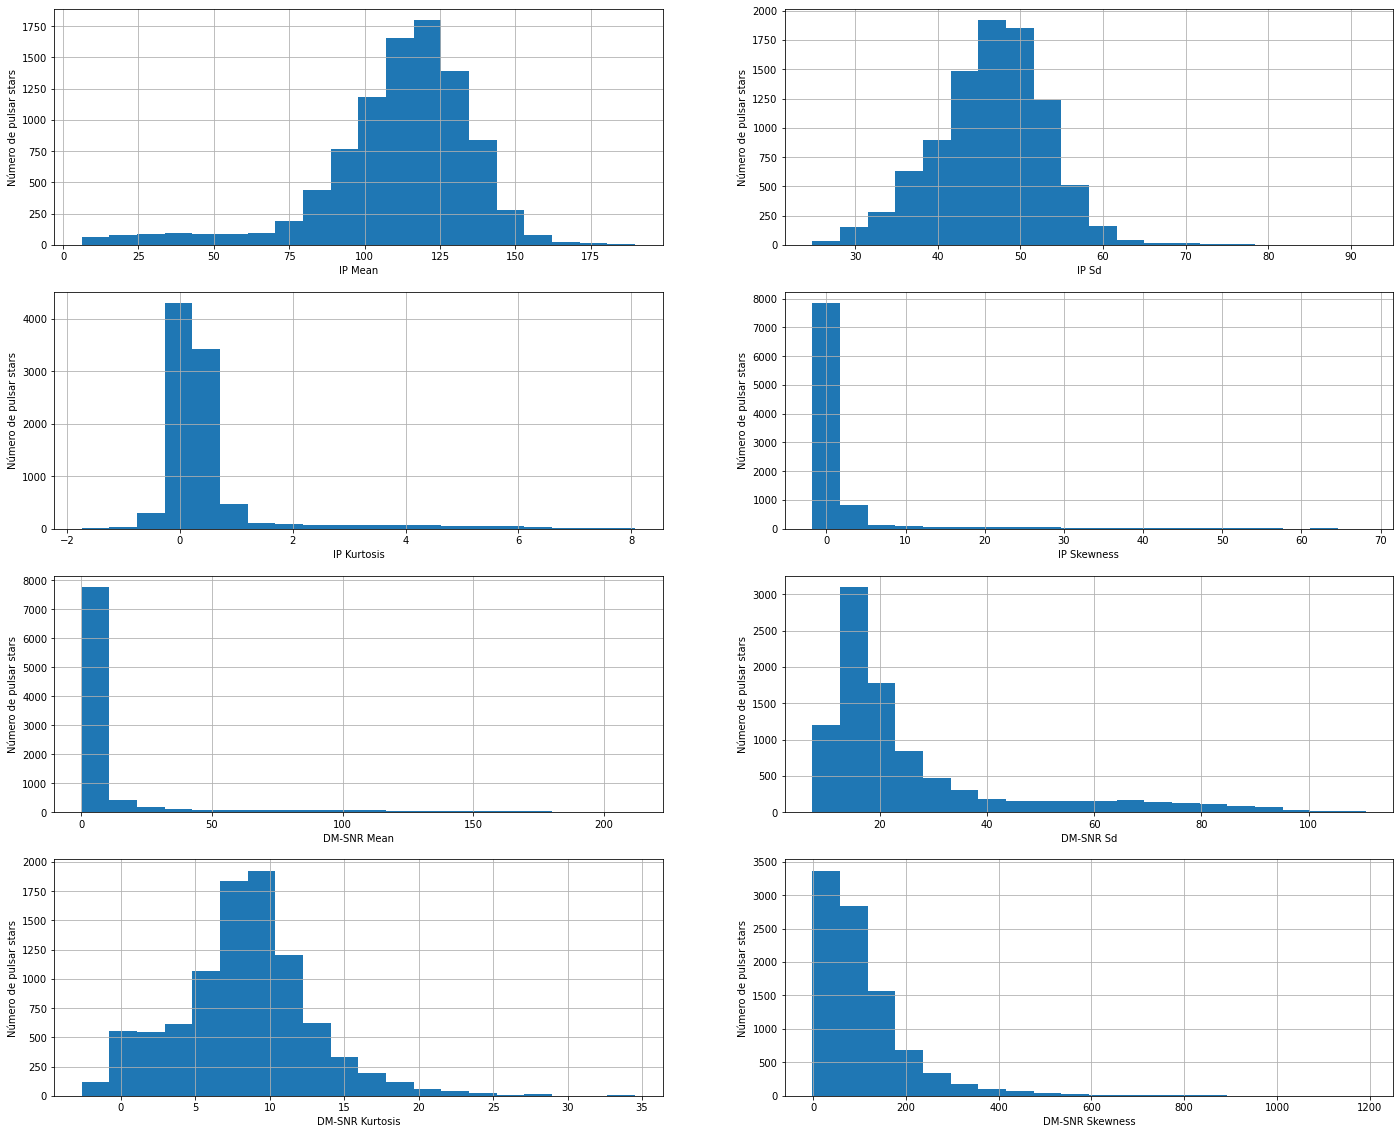

In [ ]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Número de pulsar stars')


plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Número de pulsar stars')


plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Número de pulsar stars')



plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Número de pulsar stars')



plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Número de pulsar stars')



plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Número de pulsar stars')



plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Número de pulsar stars')


plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Número de pulsar stars')

In [ ]:
df['target_class'].value_counts()

0.0    8423
1.0     850
Name: target_class, dtype: int64

*Ejercicio:*

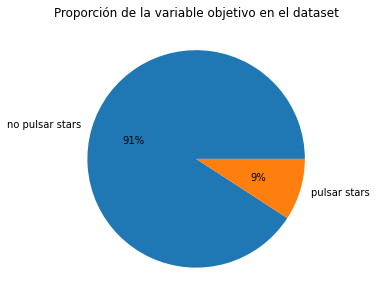

In [ ]:
plt.figure (figsize=(5,5))
plt.pie (df['target_class'].value_counts(), 
         labels=["no pulsar stars", "pulsar stars"],
         autopct = "%1.0f%%")
plt.title ("Proporción de la variable objetivo en el dataset");

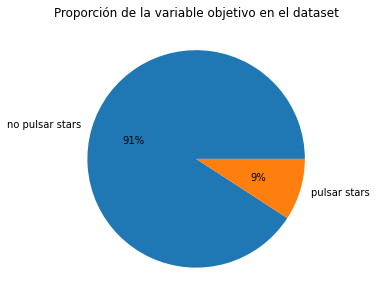

In [ ]:
#Graficación de pulsars y no pulsars
plt.figure (figsize=(5,5))
plt.pie (df['target_class'].value_counts(), 
         labels=["no pulsar stars", "pulsar stars"],
         autopct = "%1.0f%%")
plt.title ("Proporción de la variable objetivo en el dataset");

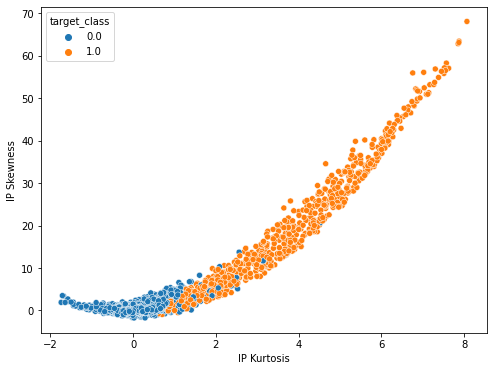

In [ ]:
plt.figure(figsize =(8,6))
sns.scatterplot(x=df['IP Kurtosis'], y=df['IP Skewness'],
                hue=df['target_class']);

In [ ]:
#Declarar vector de características y variable objetivo

X = df.drop(['target_class'], axis=1)
y = df['target_class']

In [ ]:
round (X.describe (), 2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,9273.00,9273.00,9273.00,9273.00,9273.00,9273.00,9273.00,9273.00
mean,111.13,46.51,0.48,1.79,12.74,26.33,8.33,105.78
std,25.69,6.78,1.07,6.29,29.77,19.54,4.55,108.17
min,6.19,24.77,-1.74,-1.79,0.21,7.37,-2.64,-1.98
25%,100.98,42.40,0.02,-0.19,1.91,14.38,5.79,34.92
50%,115.23,46.90,0.22,0.20,2.80,18.44,8.43,83.15
75%,127.33,51.00,0.47,0.93,5.46,28.39,10.72,139.77
max,189.73,91.81,8.07,68.10,211.95,110.64,34.54,1191.00


*Ejercicio:*

Conjuntos de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
#imports
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Modelo con hiperparámetros por default
svc = SVC ()
svc.fit (X_train, y_train)

#predicciones sobre el conjunto de prueba
y_pred = svc.predict (X_test)

#Evaluación del modelo 
print ("Accuracy con hiperparámetros por default: ", accuracy_score(y_test, y_pred))

#Matriz de confusión
cm = confusion_matrix (y_test,y_pred)
print ("Matriz de confusión:\n", cm)

Accuracy con hiperparámetros por default:  0.967654986522911
Matriz de confusión:
 [[1671   13]
 [  47  124]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(---, test_size = 0.2, random_state = 0)

SVM con hiperparámetros por default


In [ ]:
#imports
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Modelo con hiperparámetros por default
svc = SVC ()
svc.fit (X_train, y_train)

#predicciones sobre el conjunto de prueba
y_pred = svc.predict (X_test)

#Evaluación del modelo 
print ("Accuracy con hiperparámetros por default: ", accuracy_score(y_test, y_pred))

#Matriz de confusión
cm = confusion_matrix (y_test,y_pred)
print ("Matriz de confusión:\n", cm)

Accuracy con hiperparámetros por default:  0.967654986522911
Matriz de confusión:
 [[1671   13]
 [  47  124]]


*Ejercicio:*

Usando un mapa de calor de seaborn visualice la matriz de confusión

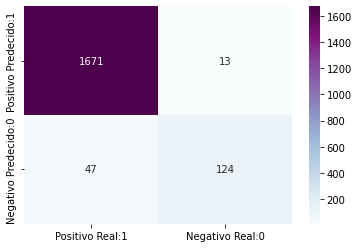

In [ ]:
cmM = pd.DataFrame (data=cm, columns=['Positivo Real:1', 'Negativo Real:0'],
                    index = ['Positivo Predecido:1', 'Negativo Predecido:0'])
sns.heatmap (cmM, annot=True, fmt='d', cmap='BuPu');

*Ejercicio:*

Evaluar los siguientes modelos SVM:    

1. rbf y C = 100.0
2. rbf y C = 1000.0
3. lineal y C= 1.0
4. lineal y C = 100
5. polinomial y C = 1.0
6. polinomial y C = 100.0

Kernel: rbf, C =  1
Accuracy:  0.967654986522911
Kernel: rbf, C =  100
Accuracy:  0.9735849056603774
Kernel: rbf, C =  1000
Accuracy:  0.9741239892183289
Kernel: linear, C =  1
Accuracy:  0.9746630727762803
Kernel: linear, C =  100
Accuracy:  0.9741239892183289
Kernel: linear, C =  1000
Accuracy:  0.9746630727762803
Kernel: poly, C =  1
Accuracy:  0.9665768194070081
Kernel: poly, C =  100
Accuracy:  0.9714285714285714
Kernel: poly, C =  1000
Accuracy:  0.9757412398921833


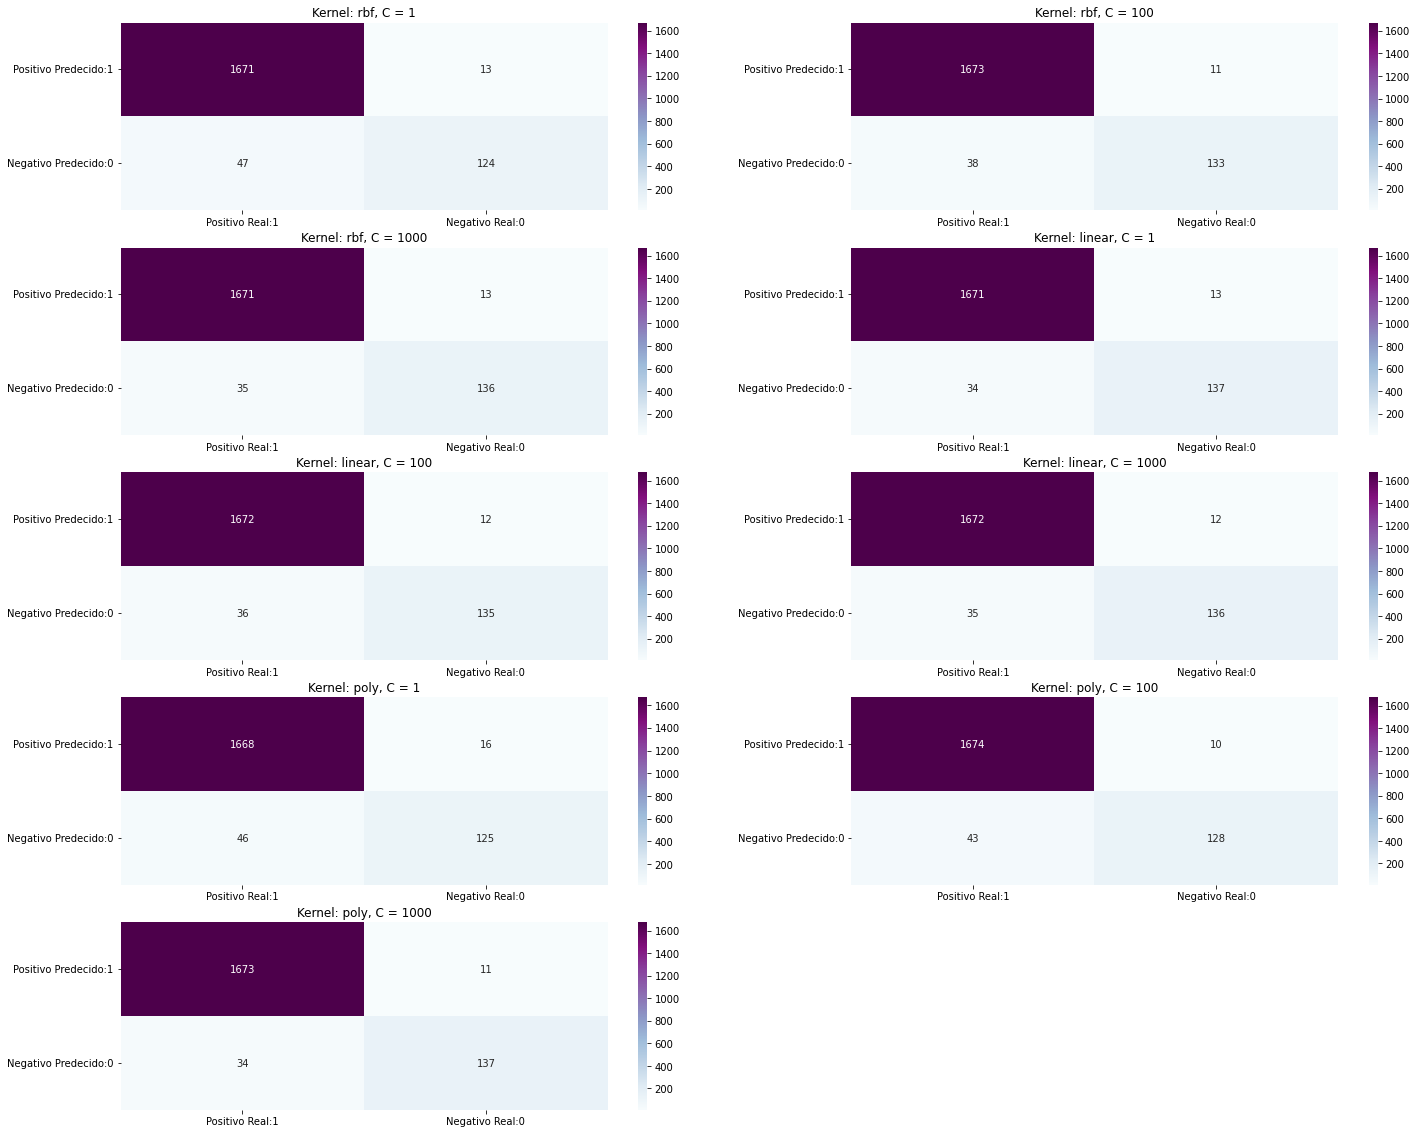

In [ ]:
kernel = ['rbf','linear','poly']
C = [1,100,1000]

mat = []
matM = []

plt.figure(figsize=(24,20))
Index=0
for i in kernel:
  
  for j in C:

    svc = SVC (kernel=i, C=j)
    svc.fit (X_train, y_train)
    y_pred = svc.predict (X_test)
    print("Kernel: " + i+", C = ",j)
    print("Accuracy: ", accuracy_score(y_test, y_pred))

    plt.subplot(5,2,Index+1)

    mat.append(confusion_matrix (y_test,y_pred))
    matM.append(pd.DataFrame (data=mat[Index], columns=['Positivo Real:1', 'Negativo Real:0'],
                      index = ['Positivo Predecido:1', 'Negativo Predecido:0']))
    plt.title("Kernel: " + i+", C = "+str(j))
    sns.heatmap (matM[Index], annot=True, fmt='d', cmap='BuPu');
    Index+=1


In [ ]:
svc = SVC (kernel='rbf', C=100)
svc.fit (X_train, y_train)

#predicciones sobre el conjunto de prueba
y_pred = svc.predict (X_test)

#Evaluación del modelo 
print ("Accuracy con hiperparámetros por default: ", accuracy_score(y_test, y_pred))

#Matriz de confusión
cm = confusion_matrix (y_test,y_pred)
print ("Matriz de confusión:\n", cm);

cmM = pd.DataFrame (data=cm, columns=['Positivo Real:1', 'Negativo Real:0'],
                    index = ['Positivo Predecido:1', 'Negativo Predecido:0'])
sns.heatmap (cmM, annot=True, fmt='d', cmap='BuPu');

##Árboles de decisión

Algo parecido puede realizarse con Árboles de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print(tree.score(X_test,y_test))

In [ ]:
tree=DecisionTreeClassifier(max_depth=4)
tree.fit(X_train,y_train)
print (tree.score (X_test, y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100).fit(X_train,y_train) 
print(forest.score(X_test,y_test))

In [ ]:
forest=RandomForestClassifier(n_estimators=150, random_state=1).fit(X_train,y_train) 
print(forest.score(X_test,y_test))

##Ejercicio SVM - Iris

Aplicar SVM al dataset iris utilice kernel polinomiales, gaussiano (kernel = 'rbf') y  sigmoide. Para cada tipo de kernel evalúe el modelo y al final compare todos los tipos.

versicolor

<img src = "https://ichi.pro/assets/images/max/724/1*f6KbPXwksAliMIsibFyGJw.png" />

Trabajo en equipos de 3 personas

Tiempo estimado : 25 minutos

In [18]:
#Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path = '/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/Irirs.csv';
header = ['sepal length','sepal width','petal length','petal width','class']
df_iris = pd.read_csv(path,names=header);
df_iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
#resumen del dataset
df_iris.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df_iris.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [10]:
#resumen estadístico
Estadistico = round(df_iris.describe(), 2)
Estadistico

,sepal length,sepal width,petal length,petal width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


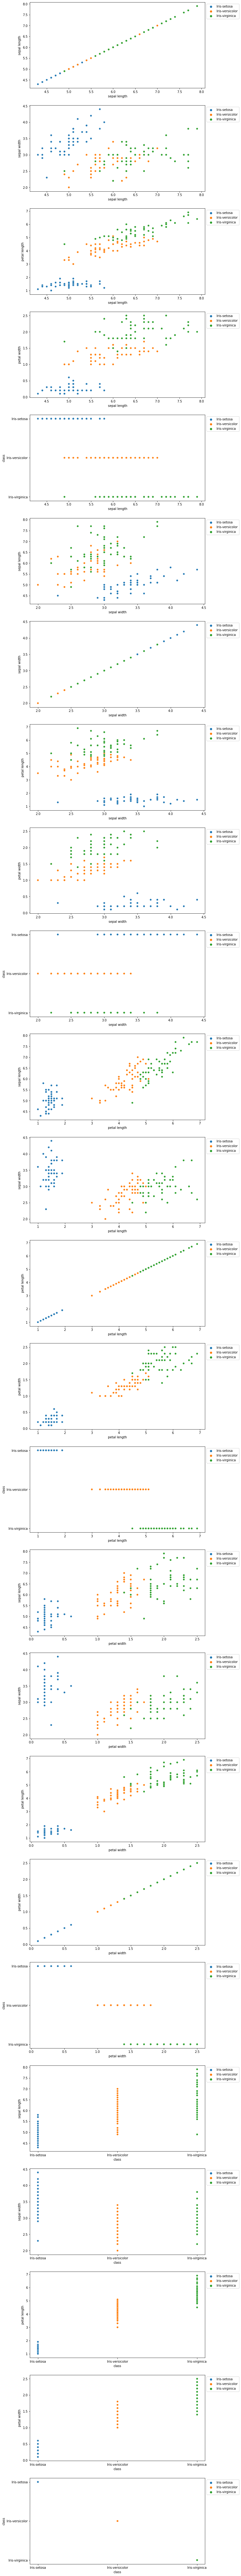

In [11]:
#Visualización
plt.figure(figsize =(10,150));
index=1;
for h in header:
  for i in header:
    plt.subplot(25,1,index);
    sns.scatterplot(x=df_iris[h], y=df_iris[i], hue=df_iris['class']);
    plt.legend(bbox_to_anchor=(1, 1), loc=2)
    index +=1;

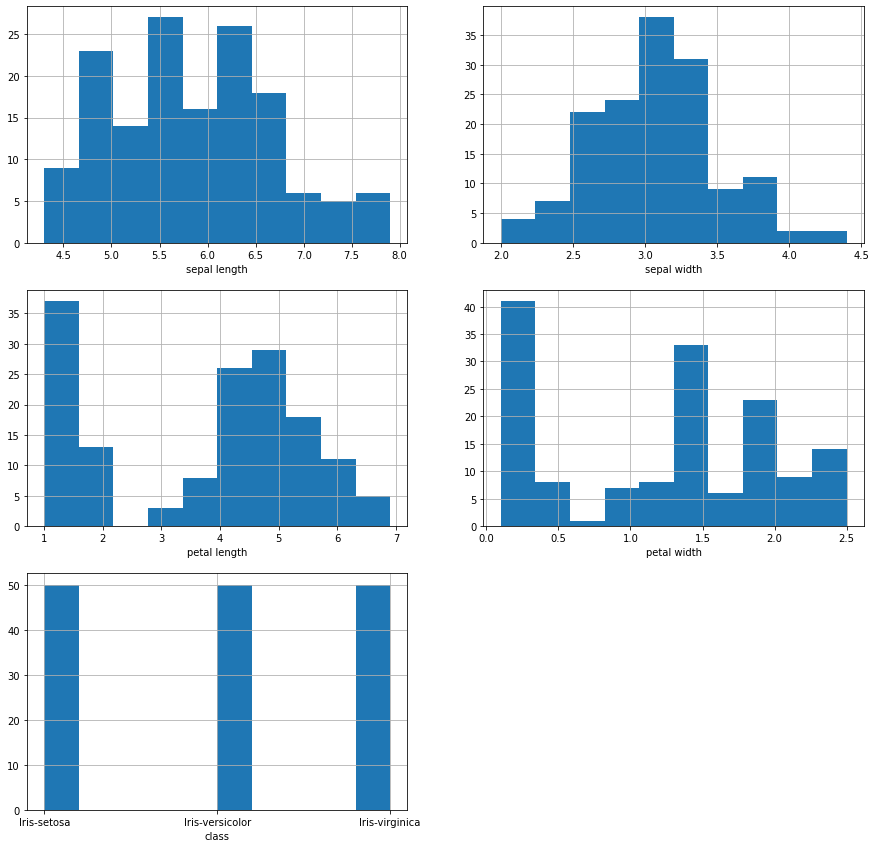

In [12]:
index=1
plt.figure(figsize =(15,20));
for i in header:
    plt.subplot(4,2,index)
    fig = df_iris[i].hist(bins=10)
    fig.set_xlabel(i)
    index += 1

TypeError: ignored

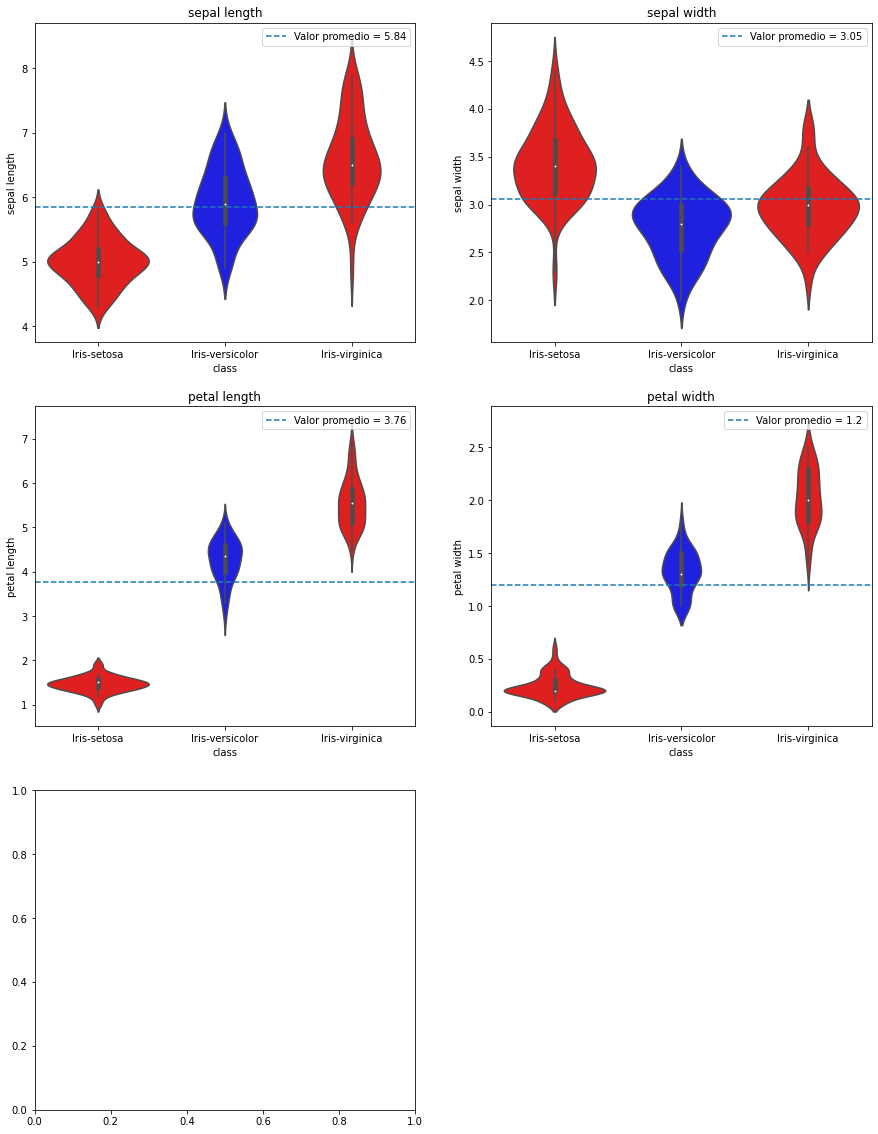

In [13]:
index=1
plt.figure(figsize =(15,20));

for i in header:
    plt.subplot(3,2,index)
    sns.violinplot(x=df_iris['class'],y=df_iris[i],palette=["red","blue"])
    plt.title(i)
    plt.axhline(df_iris[i].mean(), linestyle = "dashed", label ="Valor promedio = " + str(round(df_iris[i].mean(), 2)))
    plt.legend(loc="best")
    index += 1

In [16]:
#Declarar vector de características y variable objetivo

X = df_iris.drop(['class'], axis=1)
y = df_iris['class']
print(X,y)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns] 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: objec

In [15]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, random_state = 0)

Accuracy con hiperparámetros por default:  1.0
Matriz de confusión:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


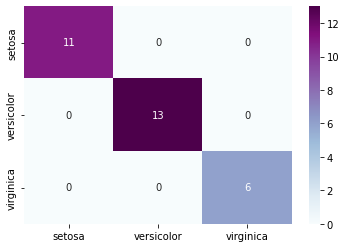

In [ ]:
svc = SVC (kernel='rbf', C=100)
svc.fit (Xtrain, ytrain)

#predicciones sobre el conjunto de prueba
ypred = svc.predict (Xtest)

#Evaluación del modelo 
print ("Accuracy con hiperparámetros por default: ", accuracy_score(ytest, ypred))

#Matriz de confusión
cm = confusion_matrix (ytest,ypred)
print ("Matriz de confusión:\n", cm);

cmM = pd.DataFrame (data=cm, columns=['setosa', 'versicolor','virginica'], index = ['setosa', 'versicolor','virginica'])
sns.heatmap (cmM, annot=True, fmt='d', cmap='BuPu');



Kernel: rbf, C =  1
Accuracy:  1.0
Kernel: rbf, C =  10
Accuracy:  1.0
Kernel: rbf, C =  100
Accuracy:  1.0
Kernel: poly, C =  1
Accuracy:  1.0
Kernel: poly, C =  10
Accuracy:  1.0
Kernel: poly, C =  100
Accuracy:  1.0
Kernel: sigmoid, C =  1
Accuracy:  0.2
Kernel: sigmoid, C =  10
Accuracy:  0.13333333333333333
Kernel: sigmoid, C =  100
Accuracy:  0.06666666666666667


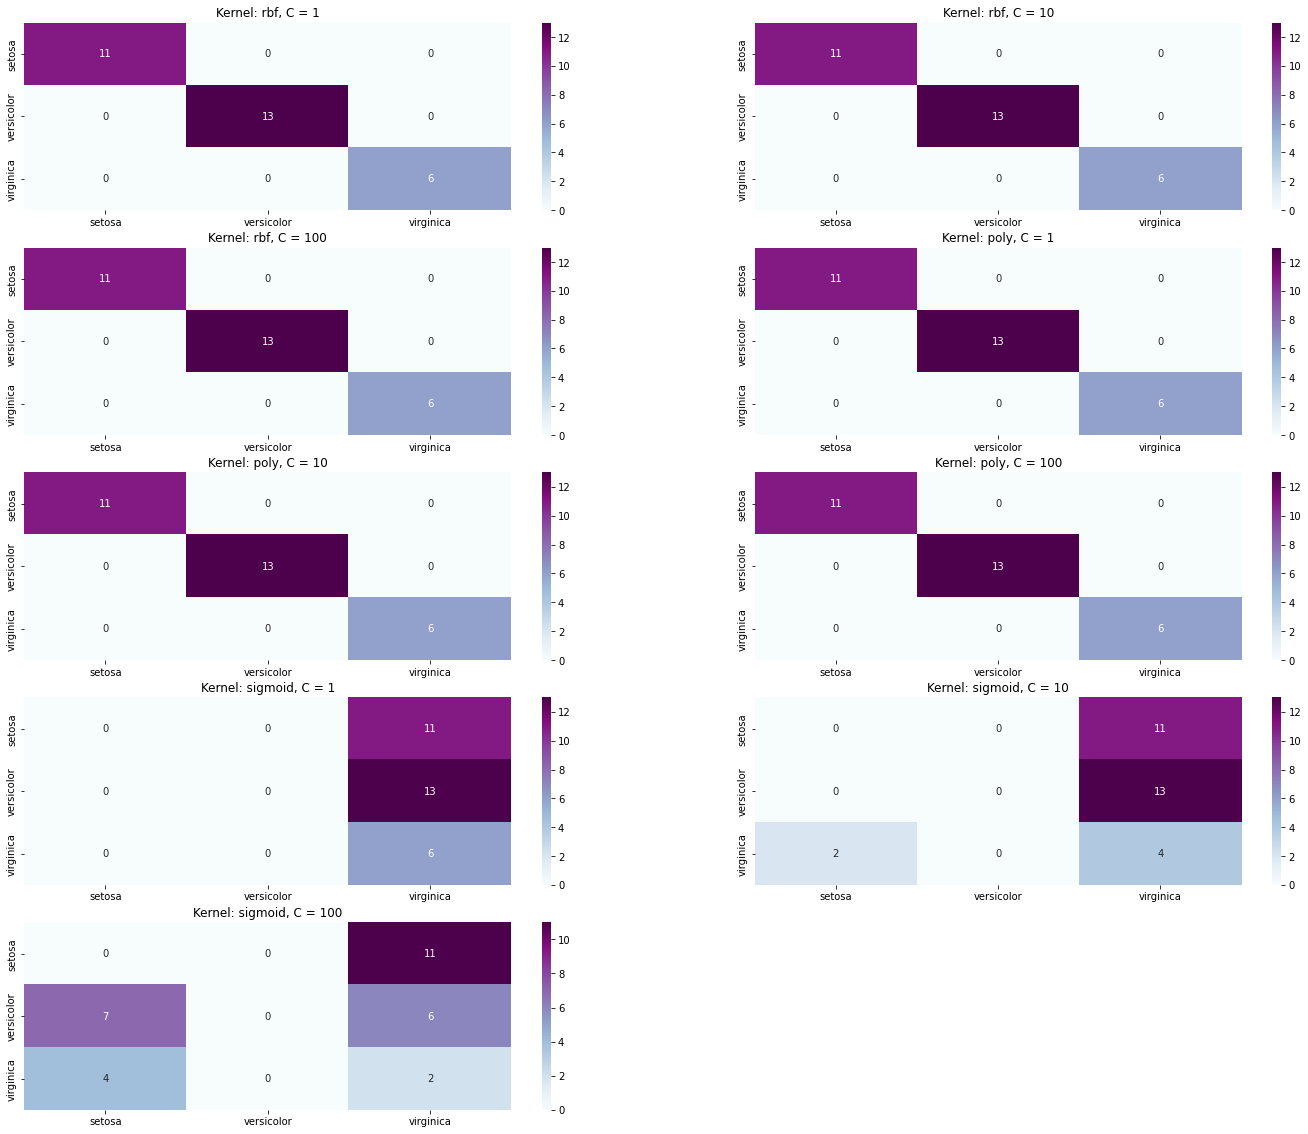

In [19]:
kernel = ['rbf','poly','sigmoid']
C = [1,10,100]

mat = []
matM = []

plt.figure(figsize=(24,20))
Index=0
for i in kernel:
  for j in C:

    svc = SVC (kernel=i, C=j)
    svc.fit (Xtrain, ytrain)
    ypred = svc.predict (Xtest)
    print("Kernel: " + i+", C = ",j)
    print("Accuracy: ", accuracy_score(ytest, ypred))

    plt.subplot(5,2,Index+1)

    mat.append(confusion_matrix (ytest,ypred))
    matM.append(pd.DataFrame (data=mat[Index], columns=['setosa', 'versicolor','virginica'],
                      index = ['setosa', 'versicolor','virginica']))
    plt.title("Kernel: " + i+", C = "+str(j))
    sns.heatmap (matM[Index], annot=True, fmt='d', cmap='BuPu');
    Index+=1

#EJERCICIO EN EQUIPO


In [21]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd

Colum = ["s_length" , "s_width" , "p_length" , "p_width" , "class"]
iris = pd.read_csv("/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/Irirs.csv", names=Colum)

iris.describe()


,s_length,s_width,p_length,p_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
iris.isnull().sum()

s_length    0
s_width     0
p_length    0
p_width     0
class       0
dtype: int64

In [23]:
iris.columns

Index(['s_length', 's_width', 'p_length', 'p_width', 'class'], dtype='object')

In [24]:
X = iris.drop(['class'], axis=1)
y = iris['class']

In [25]:
from sklearn.model_selection import train_test_split as TTS

X_train, X_test, y_train, y_test = TTS(X , y , test_size = 0.2, random_state = 0)

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [27]:
svc = SVC ()
svc.fit (X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
y_pred = svc.predict (X_test)

In [29]:
print ("Accuracy con hiperparámetros por default: ", accuracy_score(y_test, y_pred))

Accuracy con hiperparámetros por default:  1.0


In [30]:
cm = confusion_matrix (y_test,y_pred)
print ("Matriz de confusión:\n", cm)

Matriz de confusión:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [31]:
def MapaColor(CM):
  cmM = pd.DataFrame (data=CM, columns=['setosa R:1' , 'versicolor R:2' , 'virginica R:3'],
                      index = ['setosa P:1' , 'versicolor P:2' , 'virginica P:3'])
  sns.heatmap (cmM, annot=True, fmt='d', cmap='BuPu')

In [32]:
def ModeloSVM(A , B):
  #Modelo con hiperparámetros por default
  svc = SVC (kernel=A , C=B)
  svc.fit (X_train, y_train)

  #predicciones sobre el conjunto de prueba
  y_pred = svc.predict (X_test)

  #Evaluación del modelo 
  print ("Accuracy con hiperparámetros por default: ", accuracy_score(y_test, y_pred))

  #Matriz de confusión
  cm = confusion_matrix (y_test,y_pred)
  print ("Matriz de confusión:\n", cm)
  return cm;

In [33]:
import seaborn as sns

In [34]:
newCM = ModeloSVM("sigmoid" , 100.0)

Accuracy con hiperparámetros por default:  0.06666666666666667
Matriz de confusión:
 [[ 0  0 11]
 [ 7  0  6]
 [ 4  0  2]]


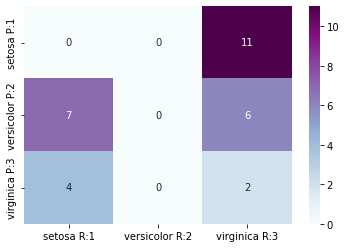

In [35]:
MapaColor(newCM)

In [38]:
kernels = ['linear','poly', 'rbf', 'sigmoid']

Accuracy con hiperparámetros por default:  1.0
Accuracy con hiperparámetros por default:  1.0
Accuracy con hiperparámetros por default:  1.0
Accuracy con hiperparámetros por default:  0.06666666666666667


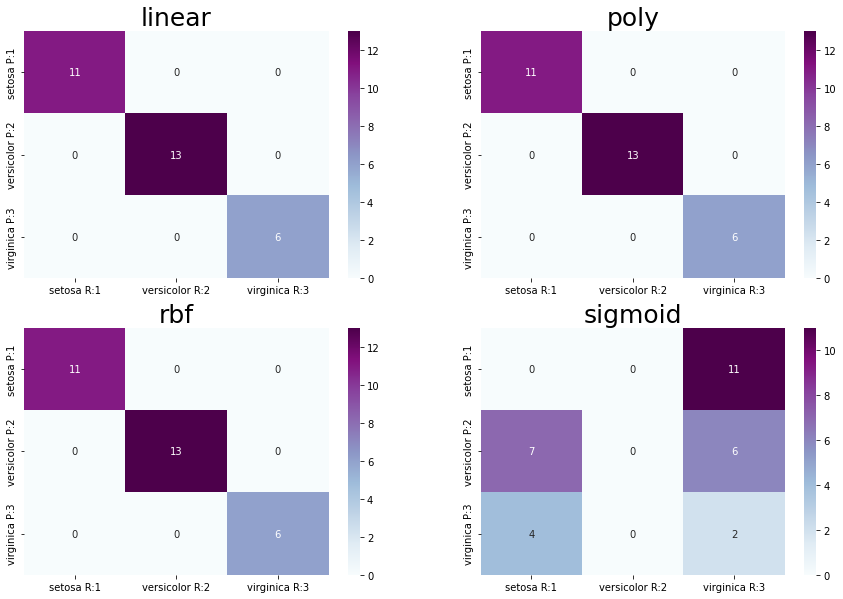

In [42]:
plt.figure(figsize=(15,10))
j = 1
for i in kernels:
  plt.subplot(2, 2, j)
  svc = SVC ( kernel = i , C = 100 )
  svc.fit ( X_train , y_train )

  #predicciones sobre el conjunto de prueba
  y_pred = svc.predict (X_test)
  print ("Accuracy con hiperparámetros por default: ", accuracy_score(y_test, y_pred))

  plt.xlabel(i , fontsize=25)
  plt.ylabel('Número de pulsar stars' , fontsize=25)
  plt.title(i , fontsize=25)
  j += 1

  cm = confusion_matrix (y_test,y_pred)
  MapaColor(cm)
